In [15]:
import pandas as pd
import os
import gc
import lightgbm as lgb
import xgboost as xgb
from catboost import CatBoostRegressor
from sklearn.linear_model import SGDRegressor, LinearRegression, Ridge
from sklearn.preprocessing import MinMaxScaler
import math
import numpy as np
from tqdm import tqdm
from sklearn.model_selection import StratifiedKFold, KFold
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
import time
import warnings
warnings.filterwarnings('ignore')

In [16]:
train_df=pd.read_csv(r'C:/Users/ZC7/Desktop/tianchi/iFLYTEK_AI/train.csv')
test_df=pd.read_csv(r'C:/Users/ZC7/Desktop/tianchi/iFLYTEK_AI/fillna_test.csv')
sub = pd.DataFrame(test_df['time'])

In [17]:
# train_df = train_df[train_df['temperature'].notnull()]
# train_df = train_df.fillna(method='bfill')
# test_df = test_df.fillna(method='bfill')
train_df.columns = ['time','year','month','day','hour','min','sec','outdoorTemp','outdoorHum','outdoorAtmo','indoorHum','indoorAtmo', 'temperature']
test_df.columns = ['time','year','month','day','hour','min','sec','outdoorTemp','outdoorHum','outdoorAtmo','indoorHum','indoorAtmo']
data_df = pd.concat([train_df, test_df], axis=0, ignore_index=True)
# data_df=test_df

In [21]:
train_df.apply(lambda x:x.dtype).reset_index()
train_df.apply(lambda x:sum(x.isnull())/len(x)).reset_index()

,index,0
0,time,float64
1,year,float64
2,month,float64
3,day,float64
4,hour,float64
5,min,float64
6,sec,float64
7,outdoorTemp,float64
8,outdoorHum,float64
9,outdoorAtmo,float64


In [18]:
#特征缺失情况,确定填补策略
train_df.apply(lambda x:sum(x.isnull())/len(x)).reset_index()

,index,0
0,time,0.000000
1,year,0.000000
2,month,0.000000
3,day,0.000000
4,hour,0.000000
5,min,0.000000
6,sec,0.000000
7,outdoorTemp,0.025885
8,outdoorHum,0.025885
9,outdoorAtmo,0.025885


In [3]:
train_data.fillna(method='ffill',inplace=True)

In [4]:
test_data.shape

(406, 12)

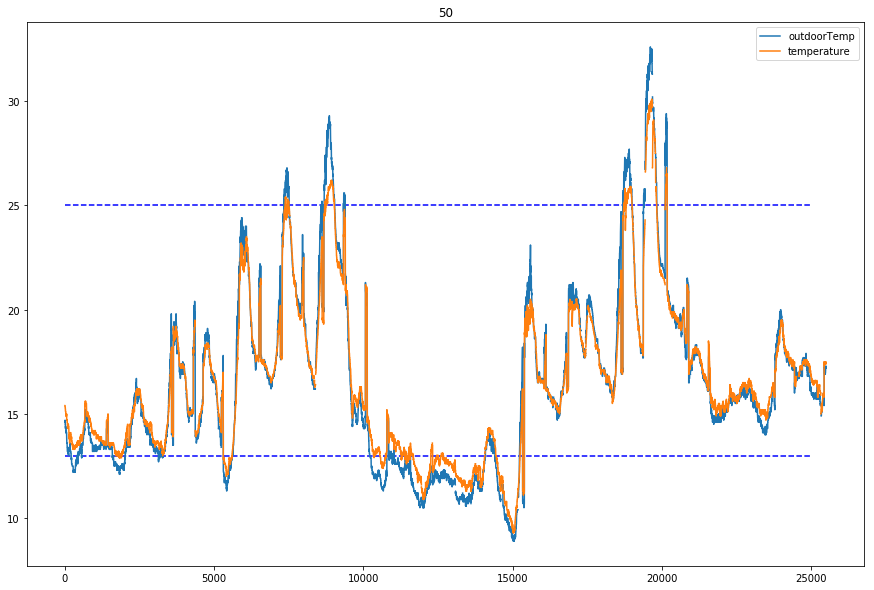

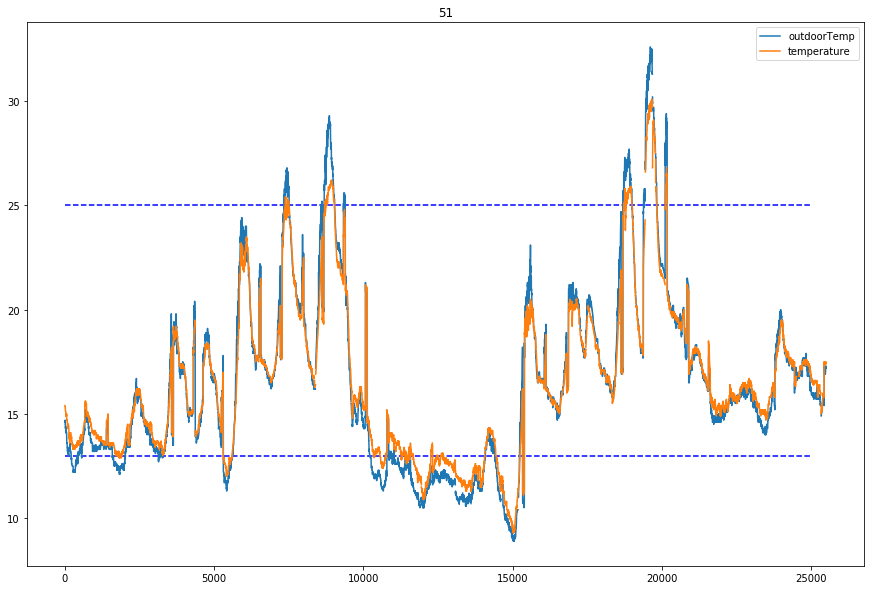

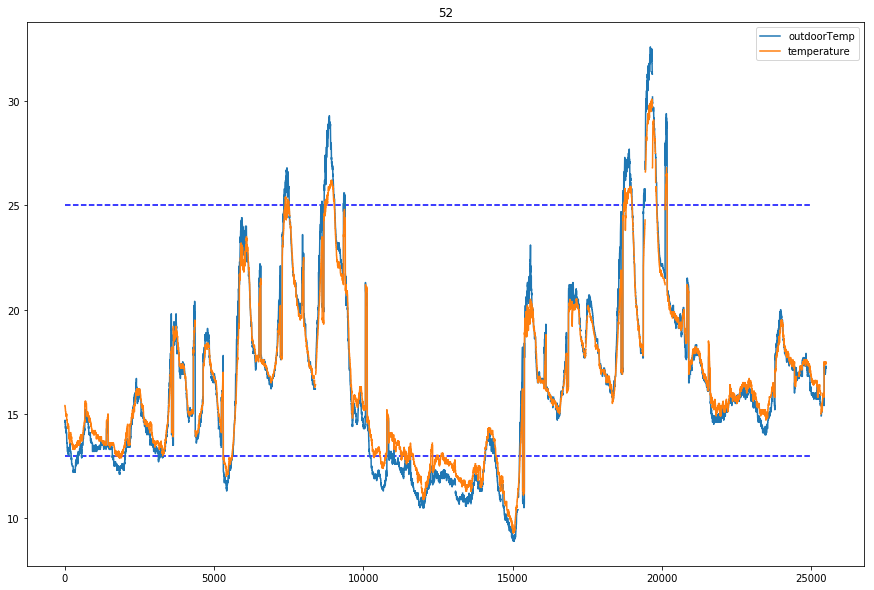

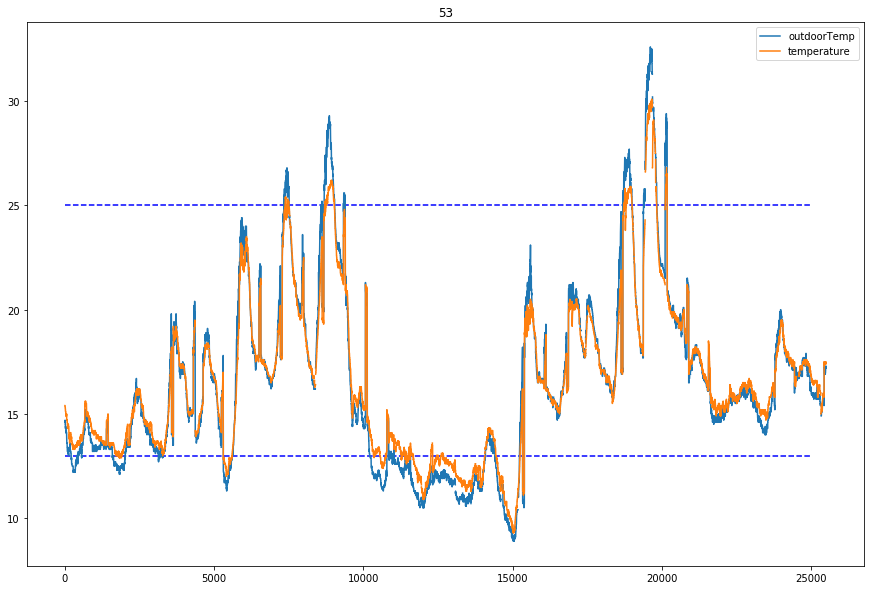

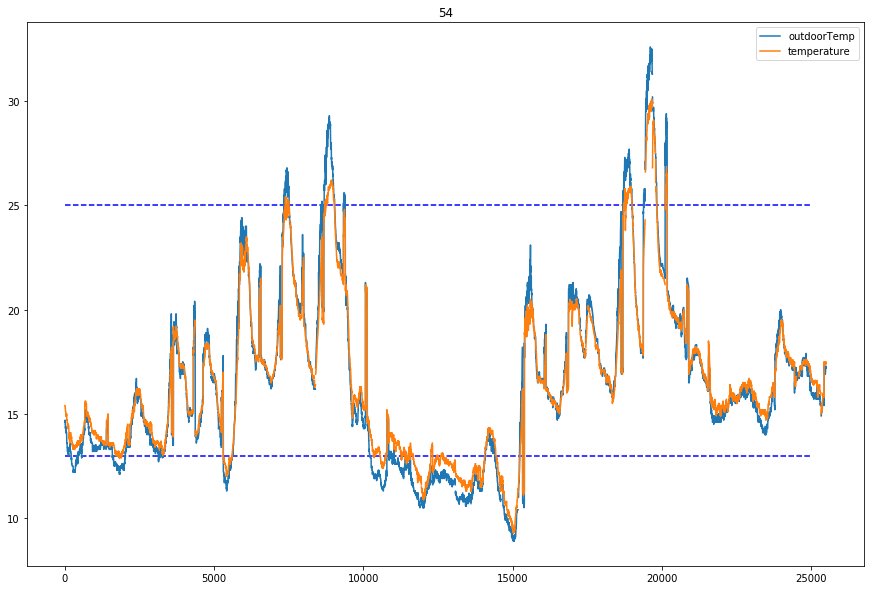

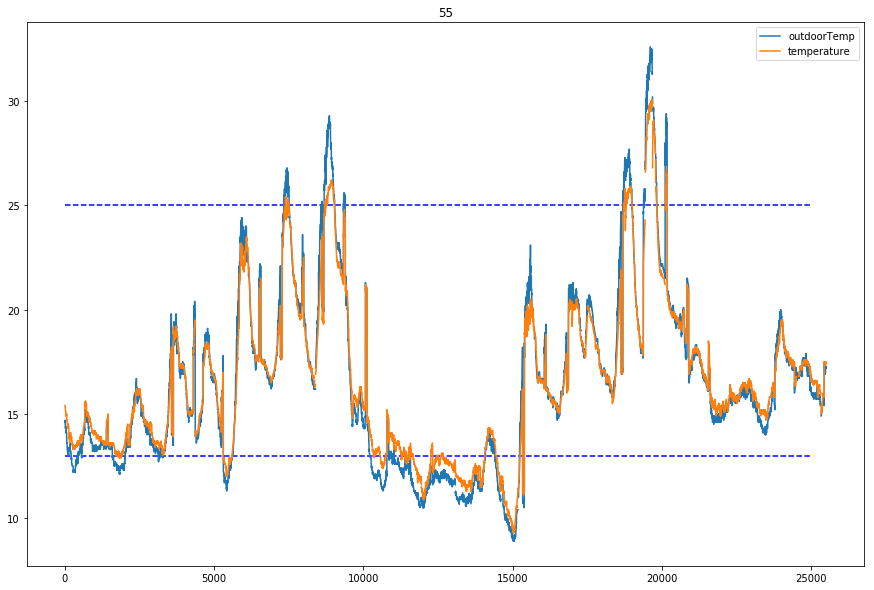

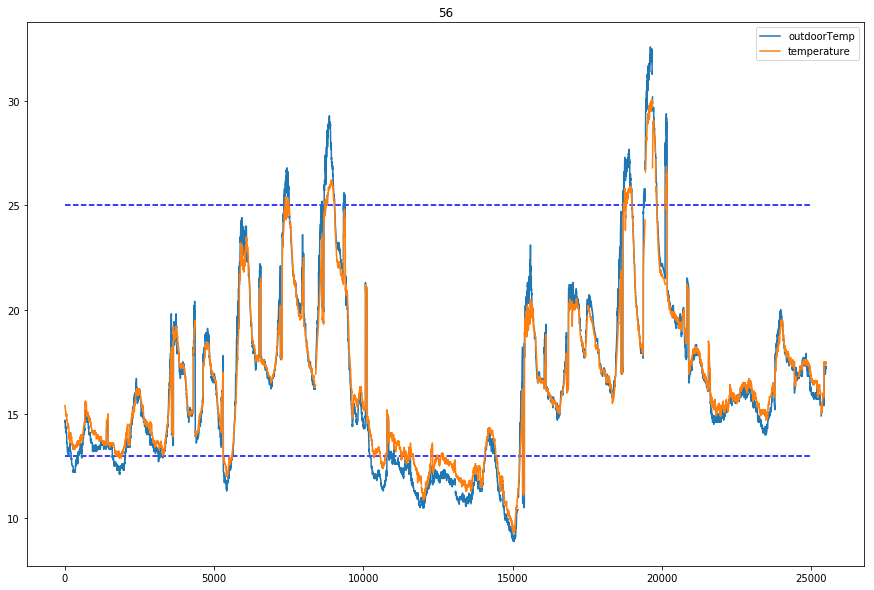

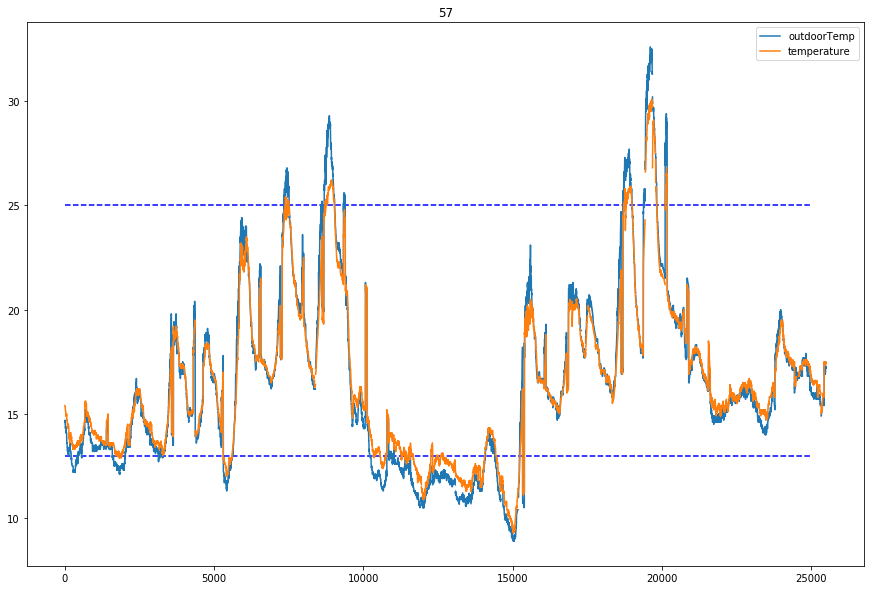

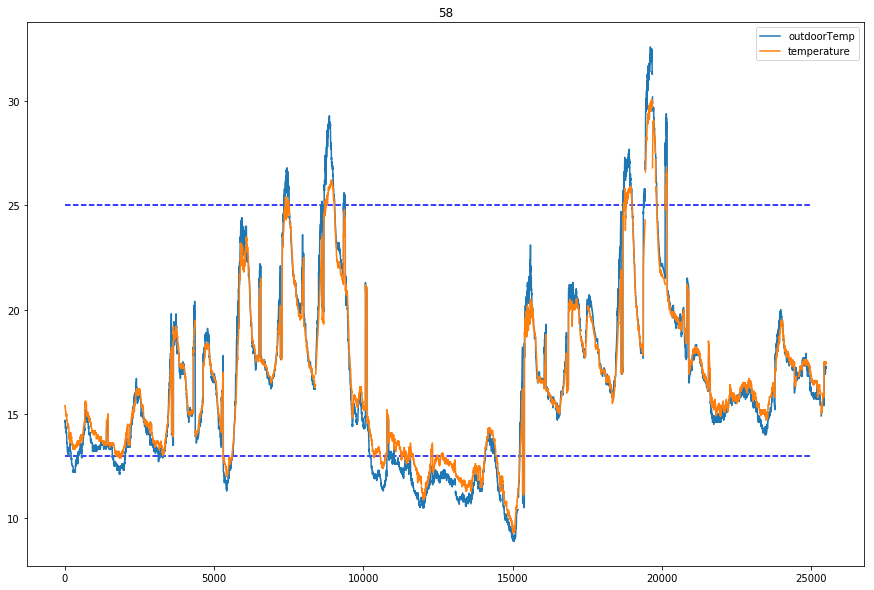

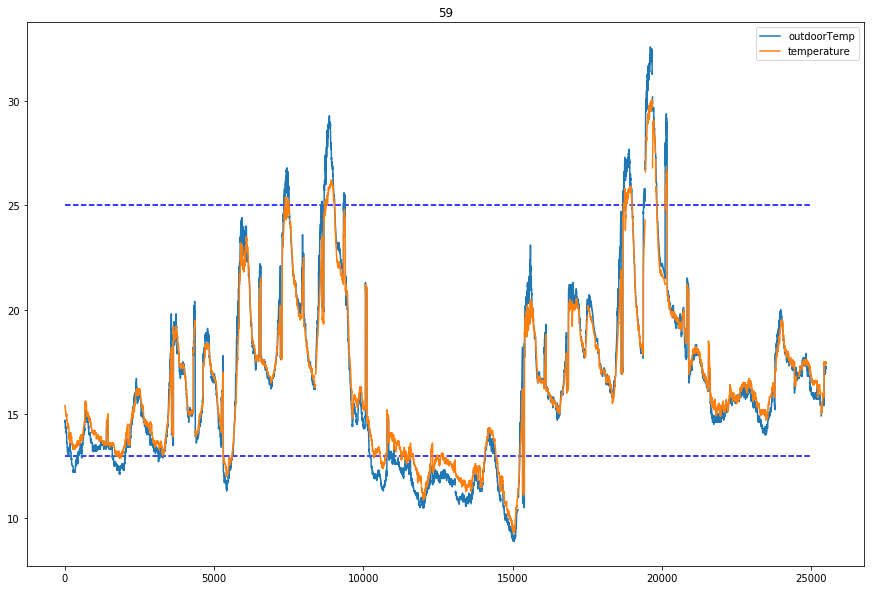

In [27]:
for i in np.arange(50,60):
    demo=train_df[train_df['min'].isin([i,i-30])].reset_index(drop=True)
#     demo['tem_out_plus']=demo['tem_out']
    fig,axes=plt.subplots(figsize=(15,10))
    train_df.plot(y='outdoorTemp',ax=axes)
    train_df.plot(y='temperature',ax=axes)
#     demo.iloc[:,:].reset_index(drop=True).plot(y='tem_out_plus',ax=axes)

    plt.hlines(25,0,25000, colors = "b", linestyles = "dashed")
    plt.hlines(13,0,25000, colors = "b", linestyles = "dashed")
#     plt.vlines(406,0, 35, colors = "b", linestyles = "dashed")
    plt.title(i)

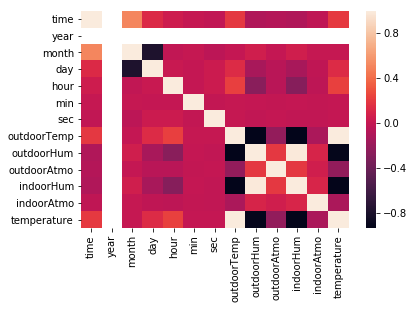

In [28]:
sns.heatmap(train_df.corr())

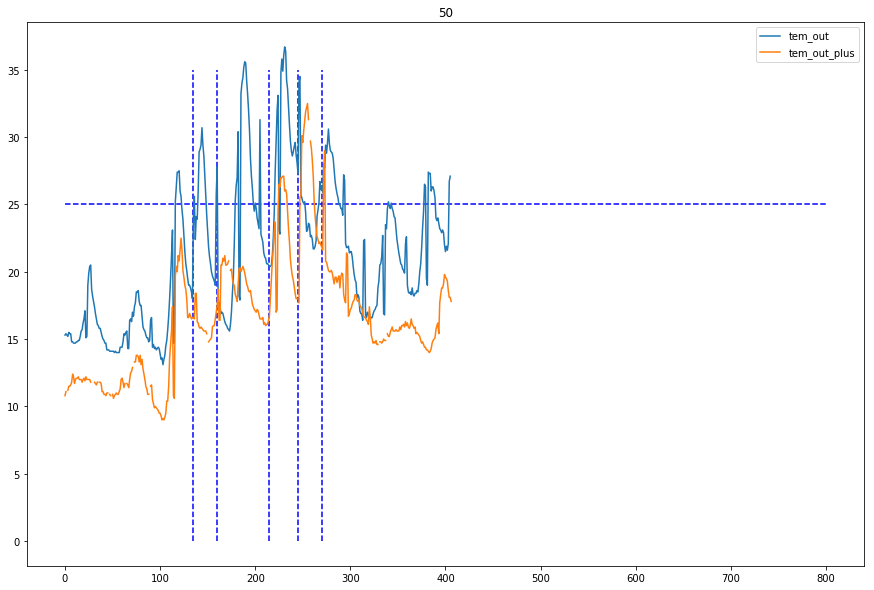

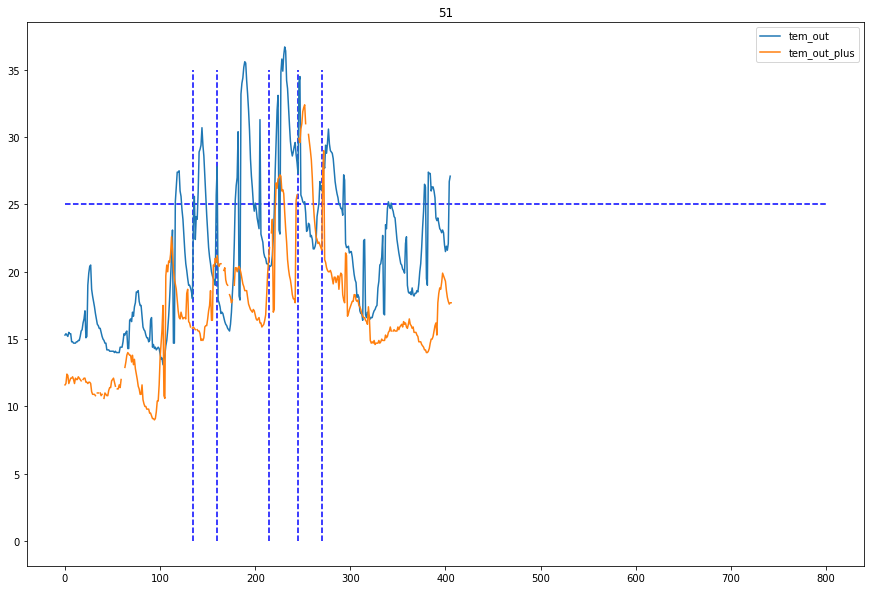

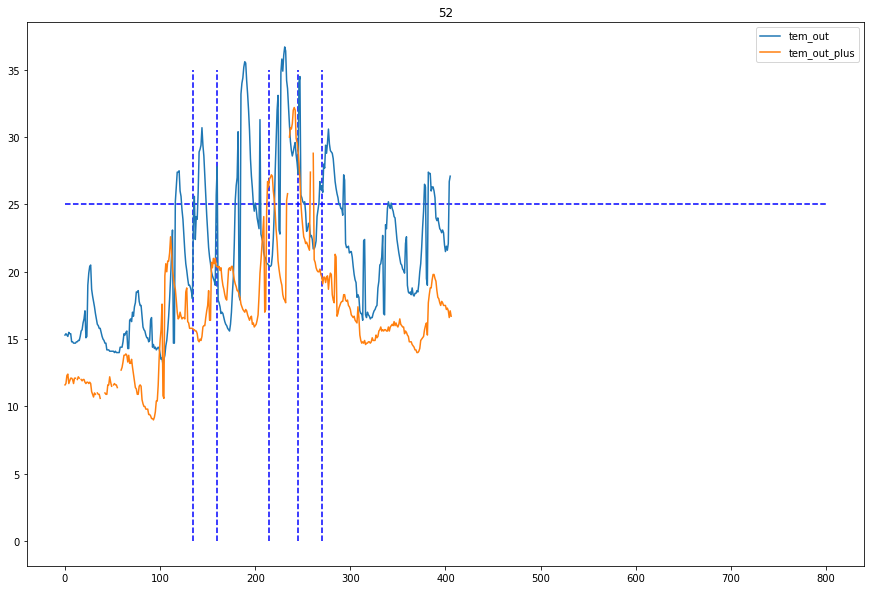

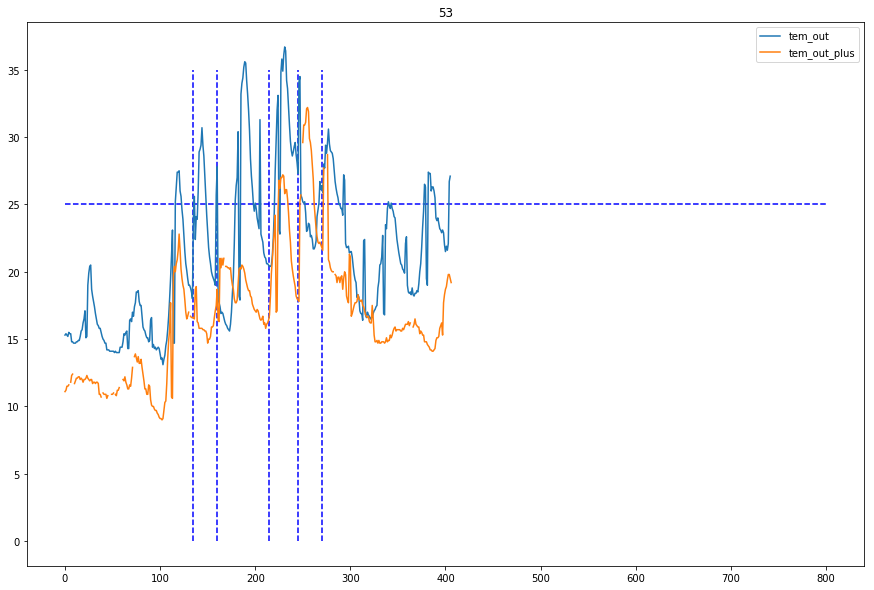

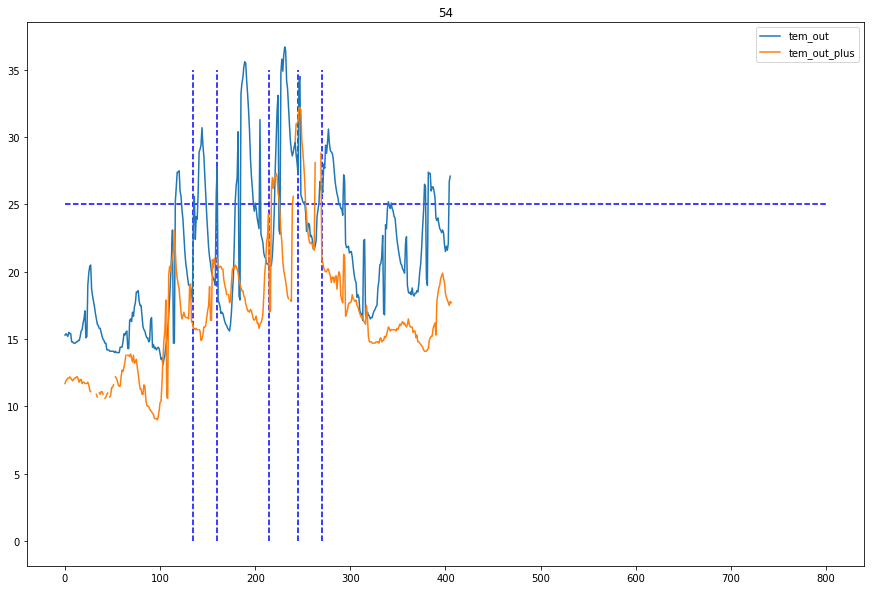

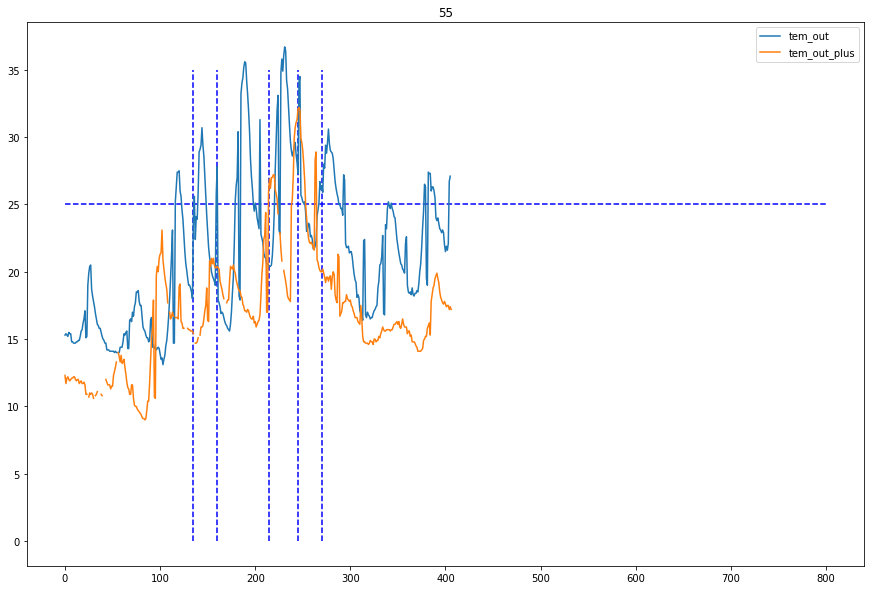

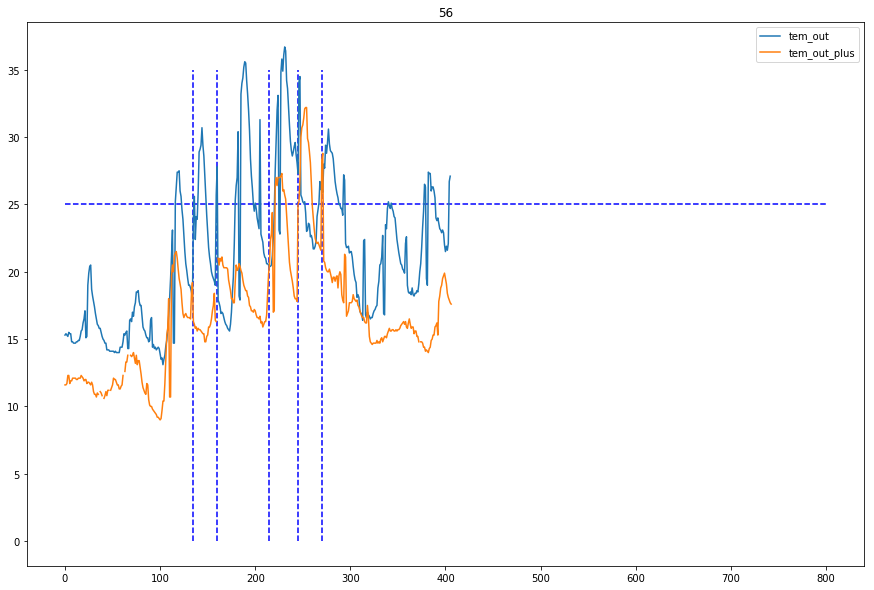

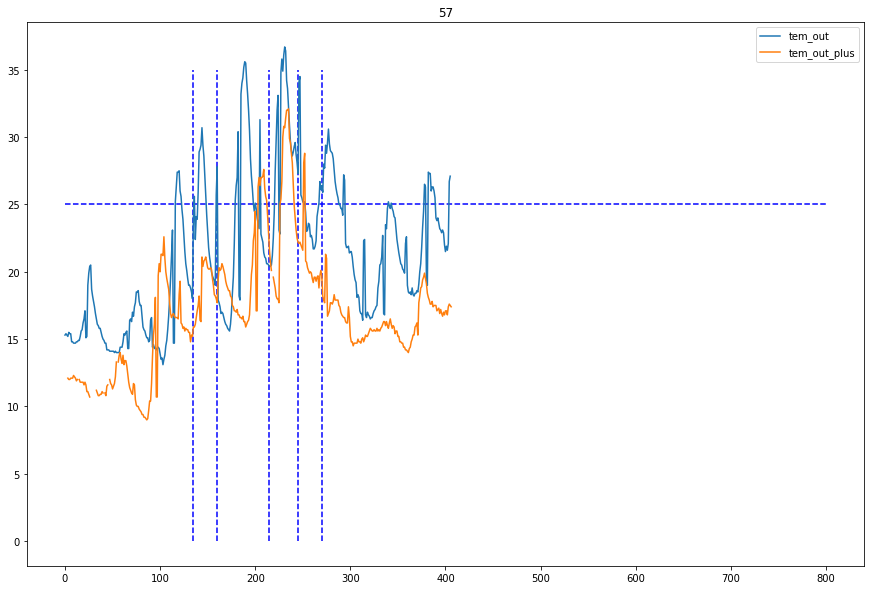

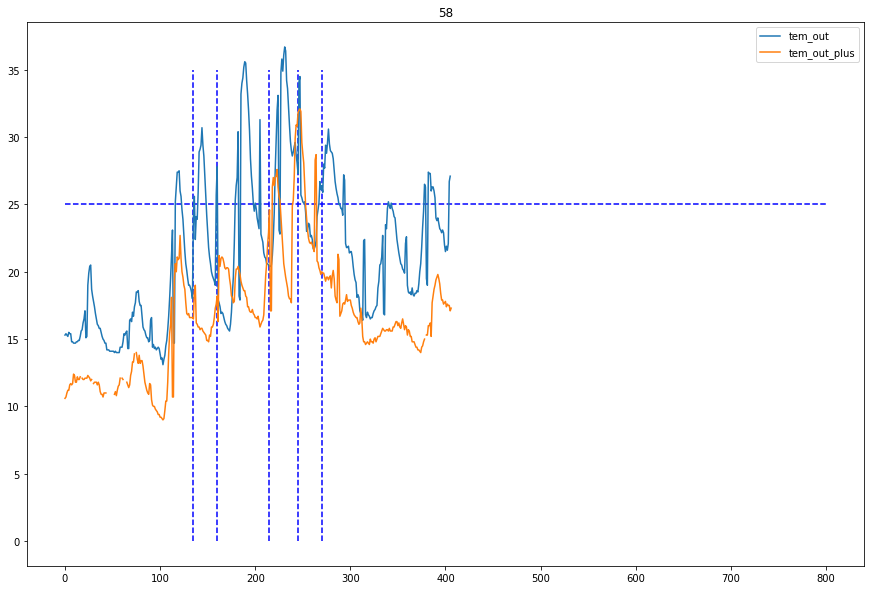

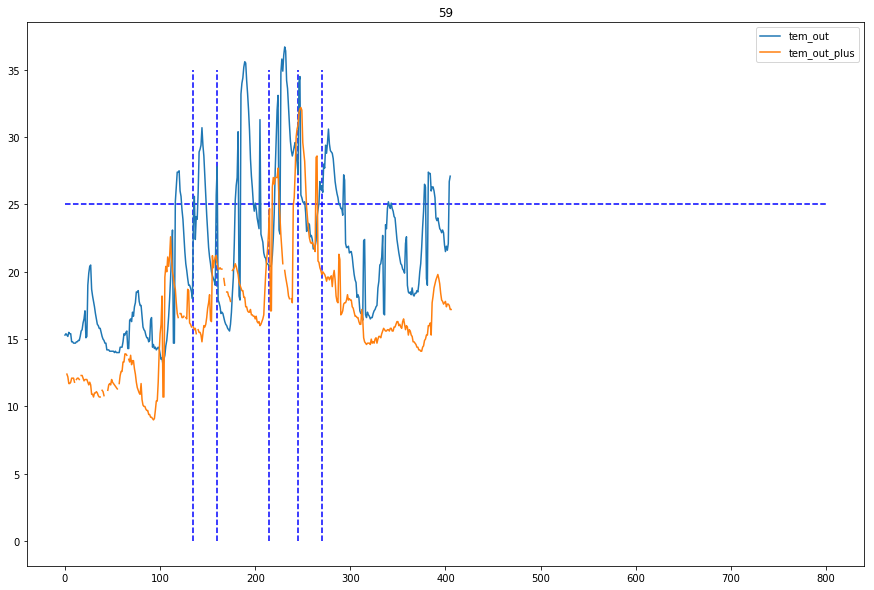

In [51]:
for i in np.arange(50,60):
    demo=train_data[train_data['min'].isin([i,i-30])].reset_index(drop=True)
    demo['tem_out_plus']=demo['tem_out']
    fig,axes=plt.subplots(figsize=(15,10))
    test_data.plot(y='tem_out',ax=axes)
    demo.iloc[406:813].reset_index(drop=True).plot(y='tem_out_plus',ax=axes)
#     demo.iloc[:406,:].reset_index(drop=True).plot(y='tem_out_plus',ax=axes)
    plt.hlines(25,0, 800, colors = "b", linestyles = "dashed")

    plt.vlines(135,0, 35, colors = "b", linestyles = "dashed")
    plt.vlines(160,0, 35, colors = "b", linestyles = "dashed")
    
    plt.vlines(215,0, 35, colors = "b", linestyles = "dashed")
    plt.vlines(245,0, 35, colors = "b", linestyles = "dashed")
    plt.vlines(270,0, 35, colors = "b", linestyles = "dashed")
    plt.title(i)